# Project: Investigate a Dataset (tmdb-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.

● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.

● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time

## Question(s) for Analysis

### Research Question 1 (How many movies released in the last 10 years )

### Research Question 2  (How long were the highest grossing movies?)

### Research Question 3 (How long was the highest budget movies?)

### Research Question 4  (What production_companies have higher popularity and vote_average and profit?)

### Research Question 5  (what are the top 10 genres of movies released ?)


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
!pip install -U pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


In [3]:
pd.__version__

'1.1.5'

<a id='wrangling'></a>
## Data Wrangling

In this step we will load the data , assess the dataset and clean it to be ready for analysis . 

### General look

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data=pd.read_csv('tmdb-movies.csv')
df=data.copy()
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.shape

(10866, 21)

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The data has null values

In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
df.duplicated().sum()

1

there is duplicated values 

In [10]:
#show some statistical information 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Modifying the data to be ready for analysis)

In [12]:
#delete the duplicated rows 
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

In [13]:
#delete unneccesary columns
df=df.drop(["imdb_id" , "homepage"  ,  "director"  , "tagline" , "keywords" , "overview" ],axis=1)

In [14]:
df.shape

(10865, 15)

In [15]:
#dealing with null values 
df['runtime'].fillna(df['runtime'].mean(),inplace=True)
#df['revenue'].fillna(df['revenue'].mean(),inplace=True)
#df['budget'].fillna(df['budget'].mean(),inplace=True)
df.fillna("Unknown",inplace=True)

In [16]:
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [17]:
#Changing the release date column into date time
df.release_date = pd.to_datetime(df['release_date'])


In [18]:
df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [19]:
#create new column for profit
df.insert(2,'profit',df["revenue"]-df["budget"])


In [20]:
df.head()

,id,popularity,profit,budget,revenue,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,228436354,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,185238201,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,1868178225,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,1316249360,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (How many movies released in the last 10 years )

https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
Name: release_year, dtype: int64


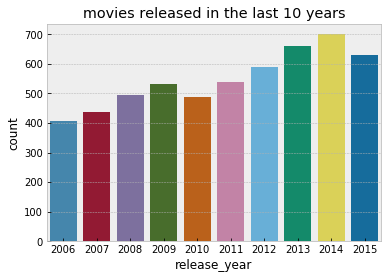

In [21]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
nmovies_by_year=df[df.release_year > 2005]
print(nmovies_by_year['release_year'].value_counts())
plt.style.use('bmh')
ax=sns.countplot(x=nmovies_by_year.release_year ,data=nmovies_by_year )
ax.set_title('movies released in the last 10 years');

The large number of movies released in last 10 years was ( in 2014 )

The less number of movies released in last 10 years was ( in 2006 )

### Research Question 2  (How long were the highest grossing movies?)

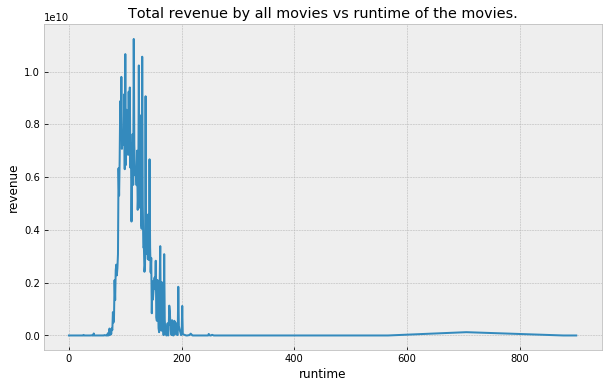

In [22]:
def line_plotter(x_axis,y_axis):
    plotter_var = df.groupby(x_axis)[y_axis].sum()
    plt.figure(figsize=(10,6))
    plt.xlabel(x_axis, fontsize = 12)
    plt.ylabel(y_axis, fontsize = 12)
    plt.title(f'Total {y_axis} by all movies vs {x_axis} of the movies.')
    plt.plot(plotter_var)
    plt.show()
    
line_plotter('runtime', 'revenue')


the movies with (115m) runtime consider the highest grossing movies (11236753450)

### Research Question 3 (How long was the highest budget movies?)


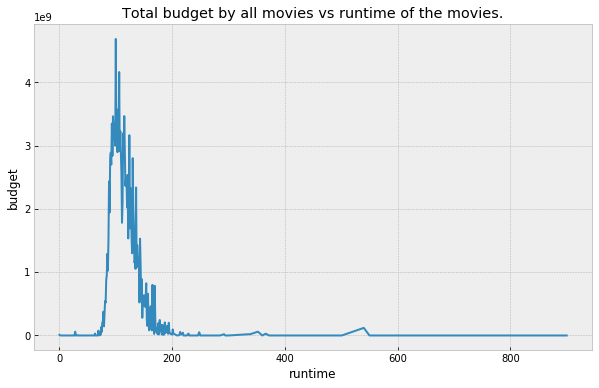

In [23]:
def line_plotter(x_axis,y_axis):
    plotter_var = df.groupby(x_axis)[y_axis].sum()
    plt.figure(figsize=(10,6))
    plt.xlabel(x_axis, fontsize = 12)
    plt.ylabel(y_axis, fontsize = 12)
    plt.title(f'Total {y_axis} by all movies vs {x_axis} of the movies.')
    plt.plot(plotter_var)
    plt.show()
    
line_plotter('runtime', 'budget')

the movies with (100m) consider the highest budget movies (4687370159)

### Research Question 4  (What production_companies have higher popularity and vote_average and profit?)

https://www.w3resource.com/pandas/dataframe/dataframe-explode.php

In [24]:
#we will split the production_companies by | and show some of it
pcompanies_df = df.assign(production_companies=df.production_companies.str.split('|')).explode('production_companies')
pcompanies_df.head()

,id,popularity,profit,budget,revenue,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Dentsu,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


Each production companies now have their seperate row which we can use to get insight on each company.

In [25]:
#create vriable pcompanies_pv =(production_companies for popularity and vote_average and profit)
pcompanies_pvp=pcompanies_df.groupby(['production_companies'],as_index=False)['popularity', 'vote_average','profit'].mean()
pcompanies_pvp.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,production_companies,popularity,vote_average,profit
0,"""DIA"" Productions GmbH & Co. KG",1.626534,5.7,8350926.0
1,# Lexyn Productions,0.468552,5.6,0.0
2,10 West Studios,0.245948,7.4,0.0
3,100 Feet Productions,0.595424,5.8,-10000000.0
4,1019 Entertainment,0.336107,5.7,801508.0


In [26]:
#top five production companies have popularity
pcompanies_pvp.sort_values(by=['popularity'], ascending = False).head(5)


,production_companies,popularity,vote_average,profit
1125,Bulletproof Cupid,14.311205,7.900000,6.033124e+08
2789,Fuji Television Network,12.777401,6.233333,5.382846e+08
1906,DefyNite Films,11.422751,7.000000,5.873990e+07
7241,Truenorth Productions,11.173104,7.500000,1.868178e+09
62,3Foot7,10.174599,7.100000,7.051198e+08


In [27]:
#last five production companies have popularity

pcompanies_pvp.sort_values(by=['popularity'], ascending = False).tail(5)


,production_companies,popularity,vote_average,profit
3358,ITVS,0.001372,7.0,0.0
4138,Logolite Entertainment,0.000620,6.1,0.0
6154,School Pictures,0.000620,6.1,0.0
5331,Parting Shots Media,0.000620,6.1,0.0
6365,Simcha Productions,0.000188,6.4,0.0


In [28]:
#top five production companies have vote average

pcompanies_pvp.sort_values(by=['vote_average'], ascending = False).head(5)


,production_companies,popularity,vote_average,profit
2117,EMI,0.212010,8.7,0.0
6039,SMV Enterprises,0.212010,8.7,0.0
5784,Red Bull Media House,0.321341,8.5,0.0
2160,Edel records GmbH,0.302908,8.5,0.0
1027,Brain Farm Digital Cinema,0.321341,8.5,0.0


In [29]:
#top five production companies have profit

pcompanies_pvp.sort_values(by=['profit'], ascending = False).head(5)


,production_companies,popularity,vote_average,profit
7241,Truenorth Productions,11.173104,7.5,1.868178e+09
3149,Harry Potter Publishing Rights,4.878162,7.2,7.882127e+08
1663,Cool Music,4.878162,7.2,7.882127e+08
4264,MIRACLE Productions GmbH & Co. KG,6.012584,7.2,7.766885e+08
1991,Disney Enterprises,3.440519,7.4,7.706260e+08


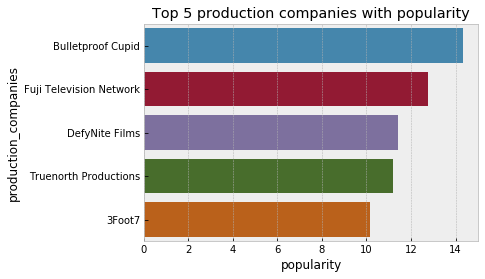

In [30]:
def top5(col_name):
    result=pcompanies_pvp.sort_values(by=col_name, ascending = False).head(5)
    pl=sns.barplot(y='production_companies',x=col_name,data=result)
    title=plt.title ("Top 5 production companies with {}".format(col_name))
    yl=plt.ylabel("{}".format('production_companies'))
    xl=plt.xlabel("{}".format(col_name))
    plt.show()
top5('popularity')

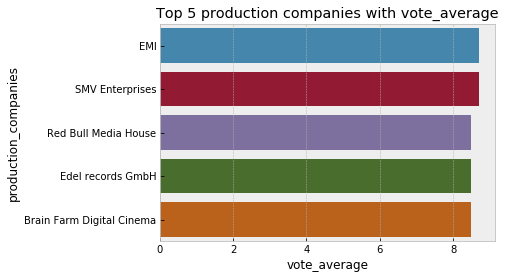

In [31]:
top5('vote_average')

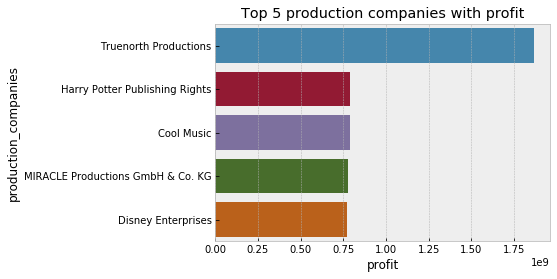

In [32]:
top5('profit')

### Research Question 5  (what are the top 10 genres of movies released ?)


In [33]:
#we will split the genres by | and show some of it
genres_df = df.assign(genres=df.genres.str.split('|')).explode('genres')
genres_df.head()

,id,popularity,profit,budget,revenue,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,228436354,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


Each production companies now have their seperate row which we can use to get insight on each company.

In [34]:
genres_ry=genres_df.groupby(['genres'],as_index=False)['release_year'].count()
genres_ry

,genres,release_year
0,Action,2384
1,Adventure,1471
2,Animation,699
3,Comedy,3793
4,Crime,1354
5,Documentary,520
6,Drama,4760
7,Family,1231
8,Fantasy,916
9,Foreign,188


In [35]:
#top 10 genres of movies
genres_ry=genres_ry.sort_values(by=['release_year'], ascending = False).head(10)


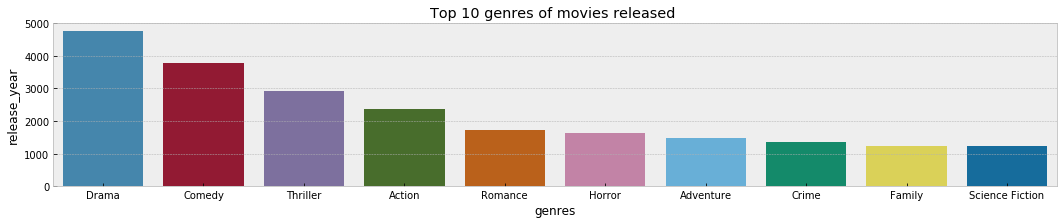

In [36]:
plt.figure(figsize=(18,3))
pl=sns.barplot(y='release_year',x=genres_ry.genres,data=genres_ry)
title=plt.title ("Top 10 genres of movies released ")
plt.show();

<a id='conclusions'></a>
## Conclusions
The large number of movies released in last 10 years was ( in 2014 )

The less number of movies released in last 10 years was ( in 2006 )

the movies with (115m) runtime consider the highest grossing movies (11236753450)

the movies with (100m) consider the highest budget movies (4687370159)

Bulletproof Cupid is the highest company with probability then Fuji Television Network and then DefyNite Films and then Truenorth Productions and then 3Foot7

EMI is the highest company with vote_average then SMV Enterprises and then Red Bull Media House and then Edel records GmbH and then Brain Farm Digital Cinema

Truenorth Productions is the highest company with profit and then Harry Potter Publishing Rights and then Cool Music and then 

MIRACLE Productions GmbH and then Disney Enterprises

the top 10 genres of movies released are (drama , comedy , thriller , action , romance , horror , adventure , crime , family then science fiction)

## Limitations
the data has alot of null values and (runtime , revenue , budjet ) columns has zeroes values and if i delete them ,i will lose more than the half of the data 

the runtime column doesn't have time unit

the budget and revenue columns don't have unit for currency



In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-template.ipynb'])

0